# Libraries Imports

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
raw_data = pd.read_csv('../raw_data/raw_data.csv')
raw_data.head(5)

,ID Aluno,Turma,Plano,Faixa,Redações,Vídeos,Questões,Data Matr.,Simulados,Tutor,Logins,Perfil,Data Cancel.,Data Nasc.,Acesso até
0,95738,Medicina 2020,MONTHLY,Faixa Branca Grau III,0,1,0,04/04/2017 05:40:09,1,COM TUTOR,1,Exclusivo,NaN,NaN,18/03/2020 02:59:59
1,112701,Medicina 2020,MONTHLY,Faixa Preta Grau III,0,9,124,07/11/2017 14:06:36,1,COM TUTOR,4,Exclusivo,NaN,05/02/1984 00:00:00,31/12/2031 02:59:59
2,112702,Medicina 2020,MONTHLY,Faixa Verde Grau II,2,74,1359,07/11/2017 15:43:33,4,COM TUTOR,86,Exclusivo,NaN,19/07/1980 00:00:00,30/12/2029 15:00:00
3,120504,ITA e IME 2020,FULL,Faixa Branca Grau I,0,24,64,27/09/2019 00:00:00,4,COM TUTOR,5,Exclusivo,20/02/2020 02:59:59,07/04/2002 00:00:00,24/12/2020 15:00:00
4,120759,ITA e IME 2020,FULL,Faixa Verde Grau I,17,1166,1598,18/08/2019 00:00:00,2,COM TUTOR,237,Exclusivo,NaN,05/12/2001 00:00:00,22/02/2021 02:59:59


In [3]:
df = raw_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27498 entries, 0 to 27497
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Aluno      27498 non-null  int64 
 1   Turma         27498 non-null  object
 2   Plano         27498 non-null  object
 3   Faixa         27498 non-null  object
 4   Redações      27498 non-null  int64 
 5   Vídeos        27498 non-null  int64 
 6   Questões      27498 non-null  int64 
 7   Data Matr.    27058 non-null  object
 8   Simulados     27498 non-null  int64 
 9   Tutor         27498 non-null  object
 10  Logins        27498 non-null  int64 
 11  Perfil        27498 non-null  object
 12  Data Cancel.  4001 non-null   object
 13  Data Nasc.    11315 non-null  object
 14  Acesso até    27498 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB


# Student Profile

In [4]:
df3 = df.copy()

## Turma

In [5]:
df_turma = df3.copy()

In [6]:
#Checking the % of students by class/interest
df_turma['Turma'].value_counts()/df.shape[0]*100

Medicina e Extensivo 2019             32.675104
ITA e IME 2019                        18.466798
Semiextensivo 18                      14.306495
Extensivo Medicina 2021               10.269838
Medicina 2020                          8.087861
ITA e IME 2020                         5.291294
Extensivo ITA/IME 2021                 4.156666
Intensivo 2018                         1.898320
Extensivo 18                           1.243727
Semiextensivo Medicina 2019            1.196451
Intensivo 2019                         1.130991
SEMIEXTENSIVO - TURMA MED 2020         0.956433
Intensivo ITA-IME 2021                 0.181831
SEMIEXTENSIVO - TURMA ITA/IME 2020     0.138192
Name: Turma, dtype: float64

More than **50%** of the students are enrolled on prep courses for **Medicina e Extensivo 2019** and **ITA e IME 2019**.

In [7]:
df_turma['Data Matr.'] = pd.to_datetime(df_turma['Data Matr.'])

In [8]:
df_turma['Year_Enrollment'] = ''

for i in range(0, df_turma.shape[0]):
    df_turma['Year_Enrollment'][i] = df_turma['Data Matr.'][i].year

/tmp/ipykernel_865/1975632869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turma['Year_Enrollment'][i] = df_turma['Data Matr.'][i].year


In [9]:
#Checking the values
df_turma['Year_Enrollment'].unique() # >>> array(['2017', '2019', '2020', '2021', '2016', 'nan', '2018'], dtype=object)

#Dropping null values
df_turma = df_turma.dropna(subset=['Year_Enrollment'])

#Changing the values to strings
df_turma['Year_Enrollment'] = df_turma['Year_Enrollment'].astype(str)

### Medicina e Extensivo 2019

In [10]:
df_med_ext_2019 = df_turma[df_turma['Turma'] == 'Medicina e Extensivo 2019']

#Getting the years of enrollment
years = sorted(df_med_ext_2019['Year_Enrollment'].unique()) # >>> ['2017', '2018', '2019']

#Getting the number of years
heights = [(df_med_ext_2019['Year_Enrollment'] == y).sum() for y in years] # >>> [8, 1453, 7508]

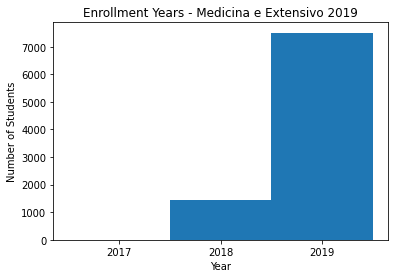

In [11]:
plt.bar(years, heights, width=1);
plt.title('Enrollment Years - Medicina e Extensivo 2019');
plt.ylabel('Number of Students');
plt.xlabel('Year');

### ITA e IME 2019

In [12]:
df_ita_ime_2019 = df_turma[df_turma['Turma'] == 'ITA e IME 2019']

#Getting the years of enrollment
years = sorted(df_ita_ime_2019['Year_Enrollment'].unique()) # >>> ['2017', '2018', '2019']

#Getting the number of years
heights = [(df_ita_ime_2019['Year_Enrollment'] == y).sum() for y in years] # >>> [8, 936, 4115]

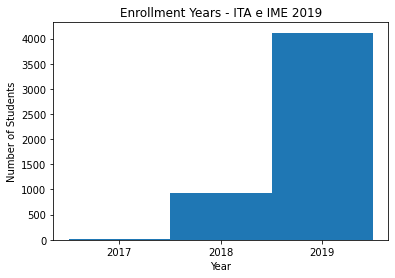

In [13]:
plt.bar(years, heights, width=1);
plt.title('Enrollment Years - ITA e IME 2019');
plt.ylabel('Number of Students');
plt.xlabel('Year');

## Plano

In [14]:
#Checking the % of students by payment plan
df3['Plano'].value_counts()/df.shape[0]*100

FULL       92.584915
MONTHLY     7.415085
Name: Plano, dtype: float64

In [15]:
#Getting the plan types
plans = sorted(df3['Plano'].unique()) # >>> ['FULL', 'MONTHLY']

#Getting the number of students per plan
heights = [(df3['Plano'] == p).sum() for p in plans] # >>> [25459, 2039]

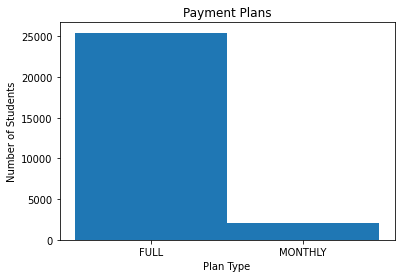

In [16]:
plt.bar(plans, heights, width=1);
plt.title('Payment Plans');
plt.ylabel('Number of Students');
plt.xlabel('Plan Type');

More than 90% of the students have chosen the **Full** plan, which means: A)they are pretty sure of their choices, or; B)the payment conditions were more attractive.

## Faixa

In [17]:
#Checking the % of students by belt
df3['Faixa'].value_counts()/df.shape[0]*100

Faixa Branca Grau I      78.907557
Faixa Branca Grau IV      5.338570
Faixa Verde Grau I        3.178413
Faixa Branca Grau V       3.174776
Faixa Verde Grau II       2.905666
Faixa Verde Grau III      1.294640
Faixa Branca Grau III     1.291003
Faixa Azul Grau III       1.185541
Faixa Azul Grau II        0.829151
Faixa Preta Grau III      0.625500
Faixa Lilás Grau I        0.290930
Faixa Lilás Grau III      0.290930
Faixa Azul Grau I         0.207288
Faixa Branca Grau II      0.192741
Faixa Preta Grau I        0.141828
Faixa Preta Grau II       0.080006
Faixa Lilás Grau II       0.065459
Name: Faixa, dtype: float64

Almost 80% of the students are classified as **Faixa Branca Grau I**, which probably means an entry-level.

## Tutor

In [18]:
#Checking the % of students by Tutor
df3['Tutor'].value_counts()/df.shape[0]*100

SEM TUTOR    74.187214
COM TUTOR    25.812786
Name: Tutor, dtype: float64

Almost 75% of the students have chosen a path **without a Tutor**.

## Perfil

In [19]:
#Checking the % of students by Profile
df3['Perfil'].value_counts()/df.shape[0]*100

Exclusivo    90.152011
Parcial       8.127864
Consulta      1.720125
Name: Perfil, dtype: float64

In [20]:
#Getting the profile types
profile = sorted(df3['Perfil'].unique()) # >>> ['Consulta', 'Exclusivo', 'Parcial']

#Getting the number of students per profile
heights = [(df3['Perfil'] == p).sum() for p in profile] # >>> [473, 24790, 2235]

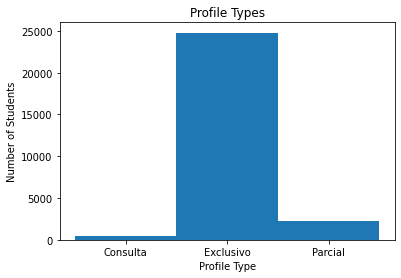

In [21]:
plt.bar(profile, heights, width=1);
plt.title('Profile Types');
plt.ylabel('Number of Students');
plt.xlabel('Profile Type');

More than 90% of the students have chosen the **Exclusive** plan. Probably it's related to the level of access they want to have.

## Data de Nascimento

In [22]:
#Checking birth dates >>>> too much null values +58% >>>> not reliable >>>> 58.85155284020656
df3['Data Nasc.'].isnull().sum()/df.shape[0]*100

58.85155284020656

Since almost 60% of the birth dates are **null**, it doesn't seems a good feature to be used as a profile maker. 

## Conclusion

**What's the general profile of the students?**

**IN SUMMARY**

We could assume the standard student has a focus on highly competitive courses, which matches the school slogan!

They mostly enroll on the course at the very year of the tests, however we do see a small amount of students who enroll a year or two before the tests.

The preferred payment option is FULL, with EXCLUSIVE access to available materials and WITHOUT the support of a Tutor. Maybe the students don't see this extra feature as worthy due to its cost.

# Student Engagement

In [23]:
df4 = df.copy()

In [24]:
#Checking the % of students who have done ZERO Simulados >>> 78.87482726016437
df4['Simulados'].value_counts()[0]/df.shape[0]*100

#Checking the % of students who have done ZERO Redações >>> 79.8094406865954
df4['Redações'].value_counts()[0]/df.shape[0]*100

#Checking the % of students who have watched ZERO Vídeos >>> 60.27347443450432
df4['Vídeos'].value_counts()[0]/df.shape[0]*100

#Checking the % of students who have done ZERO Questions >>> 55.63677358353335
df4['Questões'].value_counts()[0]/df.shape[0]*100

#Checking the % of students who have done ZERO Logins >>> 67.41217543094044
df4['Logins'].value_counts()[0]/df.shape[0]*100

67.41217543094044

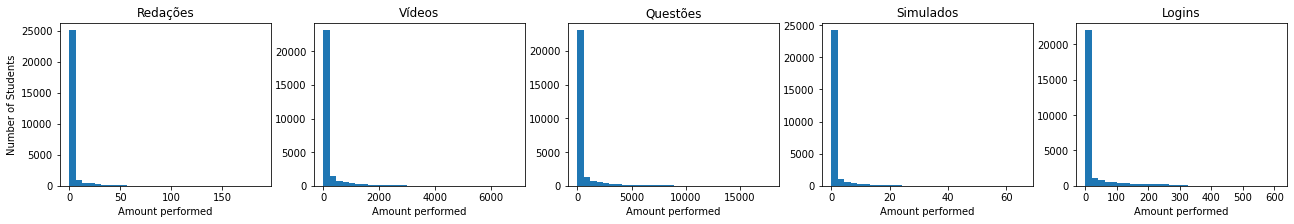

In [25]:
plt.figure(figsize=(22, 3))
plt.subplot(1, 5, 1)
plt.hist(df4['Redações'], bins=30);
plt.title('Redações');
plt.xlabel('Amount performed');
plt.ylabel('Number of Students');
plt.subplot(1, 5, 2)
plt.hist(df4['Vídeos'], bins=30);
plt.title('Vídeos');
plt.xlabel('Amount performed');
plt.subplot(1, 5, 3)
plt.hist(df4['Questões'], bins=30);
plt.title('Questões');
plt.xlabel('Amount performed');
plt.subplot(1, 5, 4)
plt.hist(df4['Simulados'], bins=30);
plt.title('Simulados');
plt.xlabel('Amount performed');
plt.subplot(1, 5, 5)
plt.hist(df4['Logins'], bins=30);
plt.title('Logins');
plt.xlabel('Amount performed');

**Considering the school methods, are the students engaged? How can we define engagement?**

Apparently **NOT**! If we consider engagement as the rate of activities the students perform after classes, we can clearly see there's not much activities being done outside the class!

The less worst activity done by the students (Questions) had an **absence rate over 50%**. 

# Student Churn

In [26]:
df5 = df.copy()

In [27]:
#Checking general churn rates >>>> less than 15% >>>> -14.55014910175285
(df5['Data Cancel.'].isnull().sum()/df.shape[0]-1)*100

-14.55014910175285

In [28]:
df5 = df5.dropna(subset=['Data Cancel.'])
df5.reset_index(drop=True, inplace=True)

In [29]:
df5['Data Cancel.'] = pd.to_datetime(df5['Data Cancel.'])
df5['Data Matr.'] = pd.to_datetime(df5['Data Matr.'])
df5['Delta'] = df5['Data Cancel.'] - df5['Data Matr.']

#df5['Data Cancel.'] = df5['Data Cancel.'].astype('datetime64[ns]')
#df5['Data Matr.'] = df5['Data Matr.'].astype('datetime64[ns]')

In [30]:
df5['Days'] = ''

In [31]:
for i in range(0, df5.shape[0]):
    df5['Days'][i] = df5['Delta'][i].days

df5.drop(columns='Delta', inplace=True)

/tmp/ipykernel_865/4020459359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Days'][i] = df5['Delta'][i].days


In [32]:
#680 records were incorrectly filled, so they won't be eligible for evaluation
df5[df5['Days'] < 0]

,ID Aluno,Turma,Plano,Faixa,Redações,Vídeos,Questões,Data Matr.,Simulados,Tutor,Logins,Perfil,Data Cancel.,Data Nasc.,Acesso até,Days
12,141835,ITA e IME 2020,FULL,Faixa Branca Grau I,0,81,97,2019-12-09 22:09:48,0,COM TUTOR,0,Parcial,2019-10-22 00:00:00,05/04/2001 00:00:00,25/12/2020 00:00:00,-49
23,141930,ITA e IME 2020,MONTHLY,Faixa Branca Grau IV,0,40,52,2019-09-28 07:16:30,0,COM TUTOR,0,Exclusivo,2019-04-11 20:52:28,12/04/2003 00:00:00,28/10/2019 07:16:28,-170
531,143587,ITA e IME 2020,MONTHLY,Faixa Branca Grau I,0,0,0,2020-03-01 19:25:02,0,COM TUTOR,0,Exclusivo,2020-01-07 15:00:00,09/11/1999 00:00:00,25/12/2020 00:00:00,-55
535,143597,ITA e IME 2020,MONTHLY,Faixa Azul Grau III,8,365,2867,2020-04-01 10:55:28,13,COM TUTOR,214,Parcial,2020-02-12 22:41:19,08/05/1999 00:00:00,25/12/2020 02:59:59,-49
540,143624,Medicina 2020,FULL,Faixa Branca Grau V,0,35,362,2020-05-01 23:06:43,0,COM TUTOR,18,Exclusivo,2020-02-19 02:59:59,10/11/1988 00:00:00,31/01/2021 00:00:00,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,142515,Medicina e Extensivo 2019,FULL,Faixa Branca Grau I,1,11,0,2019-10-30 13:42:32,0,COM TUTOR,1,Parcial,2019-01-11 14:36:31,20/02/2000 00:00:00,30/10/2019 13:42:32,-292
3991,142523,Medicina e Extensivo 2019,FULL,Faixa Branca Grau I,0,6,4,2019-10-30 17:54:43,0,COM TUTOR,5,Exclusivo,2019-05-11 07:36:22,25/07/2001 00:00:00,30/10/2019 17:54:43,-173
3992,142525,Medicina e Extensivo 2019,FULL,Faixa Branca Grau I,0,1,0,2019-10-30 18:55:38,0,COM TUTOR,2,Exclusivo,2019-01-11 12:26:58,05/03/1992 00:00:00,30/10/2019 18:55:38,-293
3993,142540,ITA e IME 2019,FULL,Faixa Branca Grau I,0,5,4,2019-10-31 20:01:08,1,COM TUTOR,2,Exclusivo,2019-01-11 11:10:38,01/04/2002 00:00:00,31/10/2019 20:01:08,-294


In [33]:
df5.drop(df5[(df5['Days'] < 0)].index, inplace=True)

## Over 30 days

In [34]:
df_over_30 = df5[df5['Days'] > 30]
df_over_30.describe()

,ID Aluno,Redações,Vídeos,Questões,Simulados,Logins
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000
mean,142286.571325,5.747089,397.696507,1295.498180,3.300218,61.610626
std,15324.699869,12.039149,698.822126,2171.571166,6.415515,92.670228
min,18942.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129711.750000,0.000000,3.750000,44.000000,0.000000,0.000000
50%,142938.500000,0.000000,95.000000,291.000000,0.000000,13.000000
75%,149870.250000,5.000000,447.250000,1553.750000,3.000000,85.000000
max,172278.000000,111.000000,6324.000000,16004.000000,62.000000,611.000000


In [35]:
days = [d for d in df_over_30['Days']]

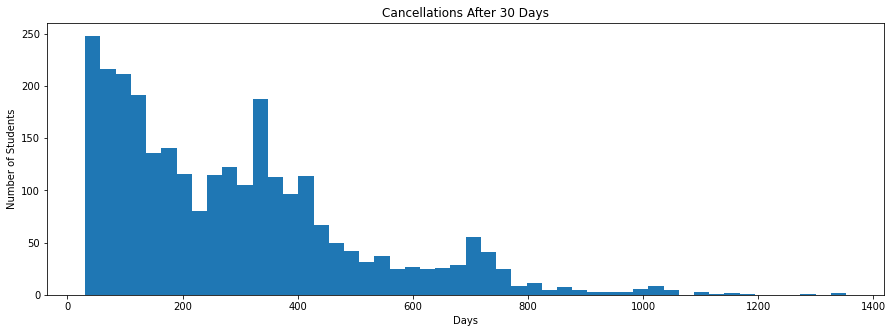

In [36]:
#Checking the distribution of days until the cancelation
plt.figure(figsize=(15, 5))
plt.hist(days, bins=50);
plt.title('Cancellations After 30 Days');
plt.xlabel('Days');
plt.ylabel('Number of Students');

In [37]:
df_over_30['Turma'].value_counts()

Extensivo Medicina 2021               541
Medicina e Extensivo 2019             506
Medicina 2020                         504
ITA e IME 2019                        426
ITA e IME 2020                        372
Extensivo ITA/IME 2021                263
SEMIEXTENSIVO - TURMA MED 2020         38
Semiextensivo Medicina 2019            31
Extensivo 18                           24
Semiextensivo 18                       18
Intensivo 2019                         14
Intensivo ITA-IME 2021                  7
SEMIEXTENSIVO - TURMA ITA/IME 2020      3
Intensivo 2018                          1
Name: Turma, dtype: int64

In [38]:
df_over_30['Tutor'].value_counts()/df_over_30.shape[0]*100

COM TUTOR    73.253275
SEM TUTOR    26.746725
Name: Tutor, dtype: float64

In [39]:
df_over_30['Perfil'].value_counts()/df_over_30.shape[0]*100

Exclusivo    75.327511
Parcial      19.614265
Consulta      5.058224
Name: Perfil, dtype: float64

In [40]:
df_over_30['Faixa'].value_counts()

Faixa Branca Grau I      1446
Faixa Branca Grau IV      291
Faixa Verde Grau II       201
Faixa Branca Grau V       186
Faixa Verde Grau I        186
Faixa Verde Grau III       90
Faixa Azul Grau III        87
Faixa Branca Grau III      76
Faixa Azul Grau II         49
Faixa Preta Grau III       48
Faixa Lilás Grau III       23
Faixa Lilás Grau I         23
Faixa Branca Grau II       15
Faixa Azul Grau I          11
Faixa Preta Grau I          7
Faixa Lilás Grau II         5
Faixa Preta Grau II         4
Name: Faixa, dtype: int64

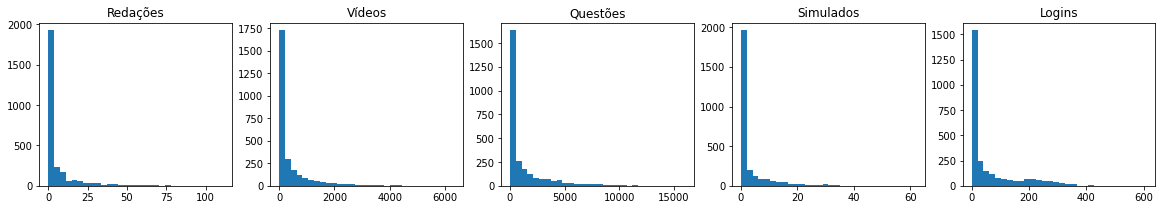

In [41]:
plt.figure(figsize=(20, 3))
plt.subplot(1, 5, 1)
plt.hist(df_over_30['Redações'], bins=30);
plt.title('Redações');
plt.subplot(1, 5, 2)
plt.hist(df_over_30['Vídeos'], bins=30);
plt.title('Vídeos');
plt.subplot(1, 5, 3)
plt.hist(df_over_30['Questões'], bins=30);
plt.title('Questões');
plt.subplot(1, 5, 4)
plt.hist(df_over_30['Simulados'], bins=30);
plt.title('Simulados');
plt.subplot(1, 5, 5)
plt.hist(df_over_30['Logins'], bins=30);
plt.title('Logins');

The majority of students who left the course after 30 days were enrolled on 2 of the most relevant courses (obviously this would happen due to its proportion). However, a similar amount of drop off students were enrolled on the same course, but for different years.

One curious fact was that most of those students were having a Tutor's support (while the majority of students choose not to proceed with this condition). This could be a sign that the drop off students realized, along with their Tutors, that they were on the wrong path (maybe due to family pressure, maybe social values and expectation).

The extra-curricular activities went by the same way: the majority of students did not perform them.

The students didn't evolve during the process, once the highest amount of drop offs were still considered White Belts I.

## Under 14 days

In [42]:
df_under_14 = df5[df5['Days'] < 15]
df_under_14.describe()

,ID Aluno,Redações,Vídeos,Questões,Simulados,Logins
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,146778.958015,0.958015,82.541985,228.969466,0.610687,9.122137
std,14467.847166,3.746026,322.414377,747.722974,2.153399,35.357078
min,113492.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135392.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,145963.500000,0.000000,6.000000,9.000000,0.000000,1.000000
75%,162057.250000,0.000000,34.750000,62.000000,0.000000,4.000000
max,171483.000000,33.000000,2816.000000,5052.000000,22.000000,264.000000


In [43]:
days = [d for d in df_under_14['Days']]

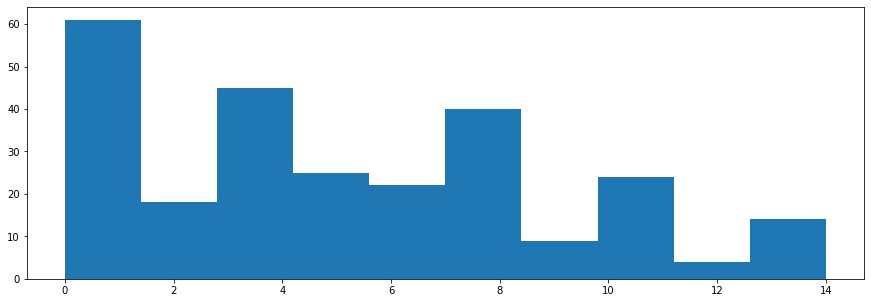

In [44]:
#Checking the distribution of days until the cancelation
plt.figure(figsize=(15, 5))
plt.hist(days, bins=10);

In [45]:
df_under_14['Turma'].value_counts()/df_under_14.shape[0]*100

Extensivo Medicina 2021               27.480916
Medicina 2020                         17.938931
Medicina e Extensivo 2019             11.450382
ITA e IME 2019                        11.450382
ITA e IME 2020                         9.923664
Extensivo ITA/IME 2021                 7.633588
Semiextensivo Medicina 2019            4.961832
SEMIEXTENSIVO - TURMA MED 2020         4.580153
Extensivo 18                           1.908397
Intensivo 2019                         1.145038
SEMIEXTENSIVO - TURMA ITA/IME 2020     0.763359
Intensivo ITA-IME 2021                 0.381679
Semiextensivo 18                       0.381679
Name: Turma, dtype: float64

In [46]:
df_under_14_med21 = df_under_14[df_under_14['Turma'] == 'Extensivo Medicina 2021']

In [47]:
#df_under_14_med21['Tutor'].value_counts()
#SEM TUTOR    71
#COM TUTOR     1

df_under_14_med21['Logins'].value_counts()

1      14
2      12
0      11
3       7
4       5
6       4
5       4
7       3
10      2
30      1
59      1
13      1
38      1
54      1
12      1
209     1
166     1
8       1
64      1
Name: Logins, dtype: int64

In [48]:
df_under_14['Tutor'].value_counts()

SEM TUTOR    153
COM TUTOR    109
Name: Tutor, dtype: int64

In [49]:
df_under_14['Perfil'].value_counts()

Exclusivo    224
Parcial       31
Consulta       7
Name: Perfil, dtype: int64

In [50]:
df_under_14['Faixa'].value_counts()

Faixa Branca Grau I      165
Faixa Branca Grau IV      43
Faixa Branca Grau III     21
Faixa Branca Grau V       13
Faixa Branca Grau II       8
Faixa Verde Grau II        5
Faixa Verde Grau I         4
Faixa Azul Grau II         2
Faixa Azul Grau III        1
Name: Faixa, dtype: int64

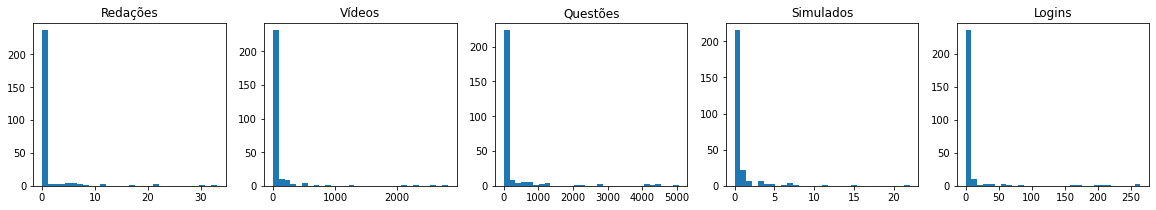

In [51]:
plt.figure(figsize=(20, 3))
plt.subplot(1, 5, 1)
plt.hist(df_under_14['Redações'], bins=30);
plt.title('Redações');
plt.subplot(1, 5, 2)
plt.hist(df_under_14['Vídeos'], bins=30);
plt.title('Vídeos');
plt.subplot(1, 5, 3)
plt.hist(df_under_14['Questões'], bins=30);
plt.title('Questões');
plt.subplot(1, 5, 4)
plt.hist(df_under_14['Simulados'], bins=30);
plt.title('Simulados');
plt.subplot(1, 5, 5)
plt.hist(df_under_14['Logins'], bins=30);
plt.title('Logins');

The majority of students who left the course after 30 days were enrolled on 2 of the most relevant courses (obviously this would happen due to its proportion). However, a similar amount of drop off students were enrolled on the same course, but for different years.

Regarding the Tutor choice, there wasn't any specific flags.

The extra-curricular activities went by the same way: the majority of students did not perform them. However, we do see some outliers. probably some students who enrolled the course, downloaded everything he could on the first days and then requested the cancellation (but this profile is not significantly among the others).

The students didn't evolve during the process, once the highest amount of drop offs were still considered White Belts I.

# Tutor's Role

In [52]:
df6 = df.copy()

In [53]:
df6 = df6[df6['Tutor'] == 'COM TUTOR']
df6

,ID Aluno,Turma,Plano,Faixa,Redações,Vídeos,Questões,Data Matr.,Simulados,Tutor,Logins,Perfil,Data Cancel.,Data Nasc.,Acesso até
0,95738,Medicina 2020,MONTHLY,Faixa Branca Grau III,0,1,0,04/04/2017 05:40:09,1,COM TUTOR,1,Exclusivo,NaN,NaN,18/03/2020 02:59:59
1,112701,Medicina 2020,MONTHLY,Faixa Preta Grau III,0,9,124,07/11/2017 14:06:36,1,COM TUTOR,4,Exclusivo,NaN,05/02/1984 00:00:00,31/12/2031 02:59:59
2,112702,Medicina 2020,MONTHLY,Faixa Verde Grau II,2,74,1359,07/11/2017 15:43:33,4,COM TUTOR,86,Exclusivo,NaN,19/07/1980 00:00:00,30/12/2029 15:00:00
3,120504,ITA e IME 2020,FULL,Faixa Branca Grau I,0,24,64,27/09/2019 00:00:00,4,COM TUTOR,5,Exclusivo,20/02/2020 02:59:59,07/04/2002 00:00:00,24/12/2020 15:00:00
4,120759,ITA e IME 2020,FULL,Faixa Verde Grau I,17,1166,1598,18/08/2019 00:00:00,2,COM TUTOR,237,Exclusivo,NaN,05/12/2001 00:00:00,22/02/2021 02:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27493,143264,ITA e IME 2019,MONTHLY,Faixa Branca Grau I,0,0,0,5/12/2019 12:48:53,0,COM TUTOR,0,Exclusivo,NaN,20/12/2000 00:00:00,23/12/2019 15:00:00
27494,143265,Medicina e Extensivo 2019,MONTHLY,Faixa Branca Grau I,3,0,0,5/12/2019 13:32:17,0,COM TUTOR,6,Exclusivo,NaN,16/03/2000 00:00:00,23/01/2020 15:00:00
27495,143269,Medicina e Extensivo 2019,MONTHLY,Faixa Branca Grau I,0,0,0,5/12/2019 17:28:52,0,COM TUTOR,0,Exclusivo,NaN,10/08/2001 00:00:00,23/01/2020 15:00:00
27496,143321,ITA e IME 2019,MONTHLY,Faixa Branca Grau I,0,35,27,9/12/2019 12:08:18,0,COM TUTOR,15,Exclusivo,NaN,30/09/2001 00:00:00,23/01/2020 15:00:00


In [54]:
df6['Redações'].value_counts()[0]/df6.shape[0]*100 # >>>> 57.4668920822767

df6['Vídeos'].value_counts()[0]/df6.shape[0]*100 # >>>> 28.585517047055507

df6['Questões'].value_counts()[0]/df6.shape[0]*100 # >>>> 24.344885883347423

df6['Simulados'].value_counts()[0]/df6.shape[0]*100 # >>>> 53.46576500422654

df6['Logins'].value_counts()[0]/df6.shape[0]*100 # >>>> 43.27979712595097

43.27979712595097